### 📚 LeNet Model

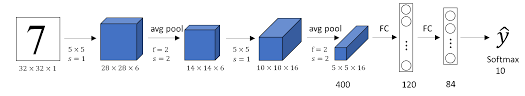

In [1]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, AvgPool2D, Flatten, Dense, MaxPool2D, BatchNormalization

In [2]:
LeNet_model = Sequential()
LeNet_model.add(Conv2D(6, kernel_size=5, activation='relu', input_shape=(28, 28,1), padding='same'))
LeNet_model.add(AvgPool2D((2, 2), strides=2))
LeNet_model.add(Conv2D(16, kernel_size=5, activation='relu'))
LeNet_model.add(AvgPool2D((2, 2), strides=2))
LeNet_model.add(Conv2D(120, kernel_size=5, activation='relu'))
LeNet_model.add(Flatten())
LeNet_model.add(Dense(84, activation='relu'))
LeNet_model.add(Dense(10, activation='softmax'))

In [3]:
LeNet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

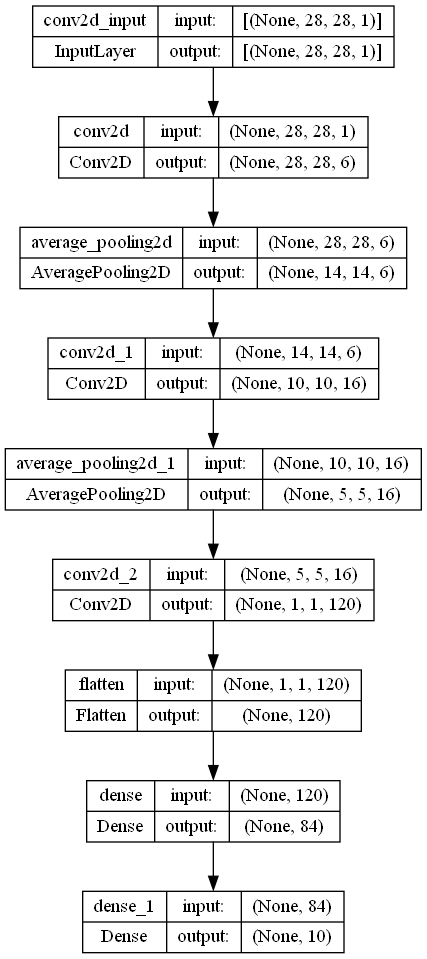

In [4]:
from tensorflow.keras.utils import plot_model
plot_model(LeNet_model, show_shapes=True, show_layer_names=True)

### 📚 AlexNet Model

![AlexNet](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FJ29tU%2Fbtq8avdCrY7%2FaIWPxEtLDWMEZidf4Hr9O1%2Fimg.png)

In [9]:
inputs = Input(shape=(227, 227, 3))
c1 = Conv2D(96, kernel_size=11, strides=4, activation='relu')(inputs)
s2 = MaxPool2D((3, 3), strides=2)(c1)

c3 = Conv2D(256, kernel_size=5, padding='same', activation='relu')(s2)
s4 = MaxPool2D((3, 3), strides=2)(c3)

c5 = Conv2D(384, kernel_size=3, padding='same', activation='relu')(s4)
c6 = Conv2D(384, kernel_size=3, padding='same', activation='relu')(c5)
c7 = Conv2D(256, kernel_size=3, padding='same', activation='relu')(c6)
s8 = MaxPool2D((3, 3), strides=2)(c7)

f9 = Flatten()(s8)
d10 = Dense(4096, activation='relu')(f9)
d11 = Dense(4096, activation='relu')(d10)
outputs = Dense(1000, activation='softmax')(d11)

In [13]:
AlexNet = Model(inputs=inputs, outputs=outputs)

In [14]:
AlexNet.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 13, 13, 384)       8851

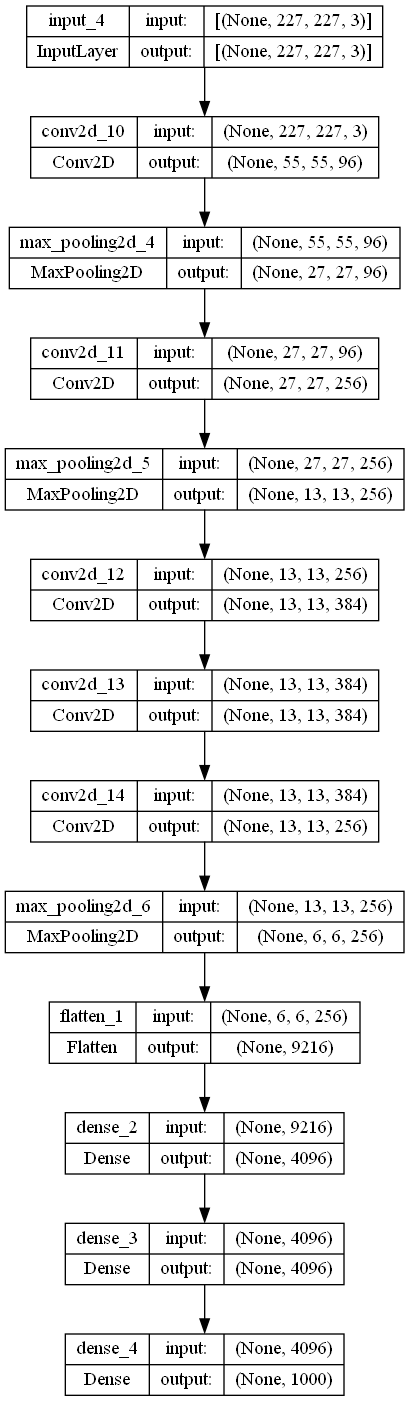

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(AlexNet, show_shapes=True, show_layer_names=True)

### 📚VGG16 Model

![VGG16](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FK990l%2FbtqwDJ7C54R%2F664Ksm6gyTGBR1wK3YPDFk%2Fimg.png)

In [20]:
class Vgg16(Sequential):
    def __init__(self, input_shape):
        super().__init__()
        self.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape)),
        self.add(Conv2D(64, (3, 3), activation='relu', padding='same')),
        self.add(MaxPool2D((2, 2), strides=2)),
                 
        self.add(Conv2D(128, (3, 3), activation='relu', padding='same')),
        self.add(Conv2D(128, (3, 3), activation='relu', padding='same')),
        self.add(MaxPool2D((2, 2), strides=2)),
        
        self.add(Conv2D(256, (3, 3), activation='relu', padding='same')),
        self.add(Conv2D(256, (3, 3), activation='relu', padding='same')),
        self.add(Conv2D(256, (3, 3), activation='relu', padding='same')),
        self.add(MaxPool2D((2, 2), strides=2)),
    
        self.add(Conv2D(512, (3, 3), activation='relu', padding='same')),
        self.add(Conv2D(512, (3, 3), activation='relu', padding='same')),
        self.add(Conv2D(512, (3, 3), activation='relu', padding='same')),
        self.add(MaxPool2D((2, 2), strides=2)),
        
        self.add(Flatten()),
        self.add(Dense(4096, activation='relu')),
        self.add(Dense(4096, activation='relu')),
        self.add(Dense(1000, activation='softmax')),
        self.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])

In [21]:
vggmodel = Vgg16(input_shape=(224, 224, 3))

In [22]:
vggmodel.summary()

Model: "vgg16_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_17 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_19 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                       

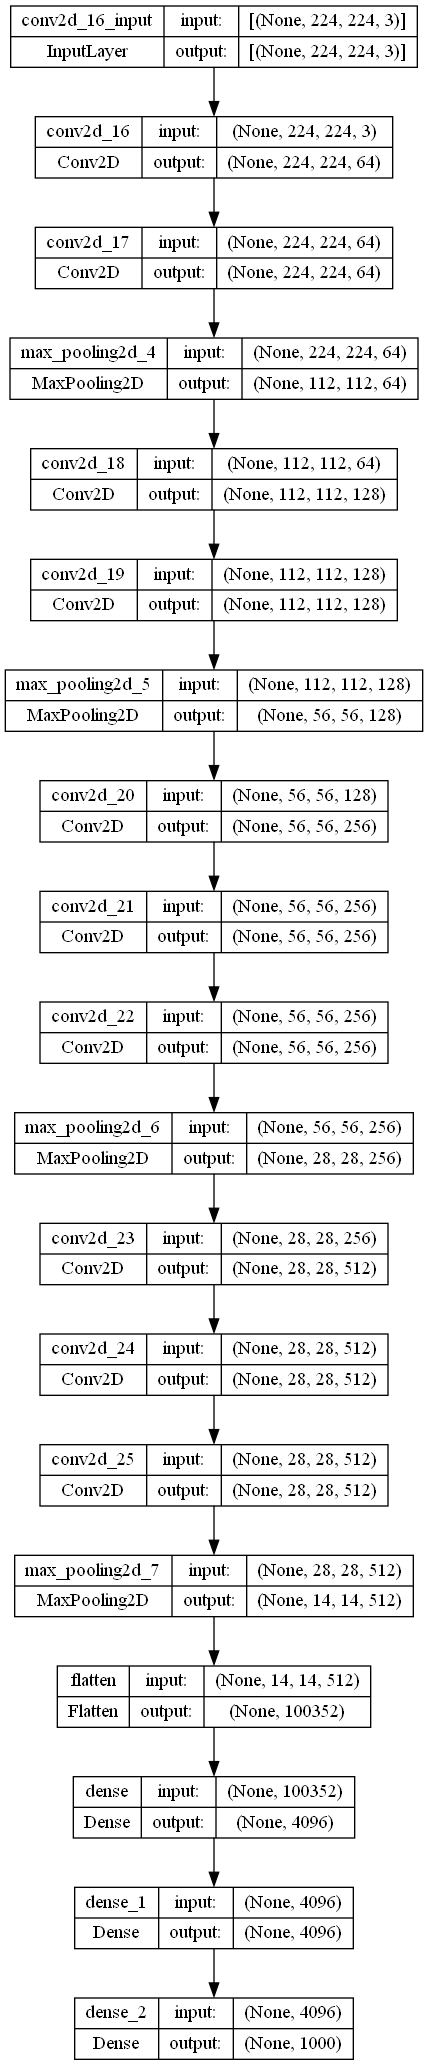

In [23]:
from tensorflow.keras.utils import plot_model
plot_model(vggmodel, show_layer_names=True, show_shapes=True)